In [2]:
import math
import numpy as np
import pandas as pd

In [75]:
# Read energy generation dataset from EIA
state_mix = pd.read_excel('annual_generation_state.xls', header = 1)

In [76]:
state_mix.head()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,1990,AK,Total Electric Power Industry,Total,5599506.0
1,1990,AK,Total Electric Power Industry,Coal,510573.0
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521.0
3,1990,AK,Total Electric Power Industry,Natural Gas,3466261.0
4,1990,AK,Total Electric Power Industry,Petroleum,497116.0


In [77]:
state_mix.tail()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
60140,2022,WY,"Electric Generators, Electric Utilities",Coal,32414149.0
60141,2022,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,734743.0
60142,2022,WY,"Electric Generators, Electric Utilities",Natural Gas,1022976.0
60143,2022,WY,"Electric Generators, Electric Utilities",Petroleum,52928.0
60144,2022,WY,"Electric Generators, Electric Utilities",Wind,5556164.0


In [78]:
state_mix = state_mix[state_mix['YEAR'] == 2022]

In [79]:
state_mix

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
58012,2022,AK,Total Electric Power Industry,Total,6694128.0
58013,2022,AK,Total Electric Power Industry,Coal,726934.0
58014,2022,AK,Total Electric Power Industry,Hydroelectric Conventional,1713426.0
58015,2022,AK,Total Electric Power Industry,Natural Gas,3229376.0
58016,2022,AK,Total Electric Power Industry,Other,-3245.0
...,...,...,...,...,...
60140,2022,WY,"Electric Generators, Electric Utilities",Coal,32414149.0
60141,2022,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,734743.0
60142,2022,WY,"Electric Generators, Electric Utilities",Natural Gas,1022976.0
60143,2022,WY,"Electric Generators, Electric Utilities",Petroleum,52928.0


In [80]:
# The goal of the next step is to merge the energy generation with energy emissions. Have to match all ENERGY SOURCE values with second dataset

state_mix = state_mix.replace(['Hydroelectric Conventional', 'Solar Thermal and Photovoltaic', 'Wind', 'Nuclear', 'Pumped Storage'], 'Other')

In [81]:
state_mix_grouped = state_mix.groupby(['STATE', 'ENERGY SOURCE'])['GENERATION (Megawatthours)'].sum().reset_index(name = 'GENERATION (Megawatthours)')
state_mix_grouped

,STATE,ENERGY SOURCE,GENERATION (Megawatthours)
0,AK,Coal,1453868.0
1,AK,Natural Gas,6458752.0
2,AK,Other,3698914.0
3,AK,Other Biomass,81672.0
4,AK,Petroleum,1695052.0
...,...,...,...
376,WY,Natural Gas,3322509.0
377,WY,Other,21573380.0
378,WY,Other Gases,657244.0
379,WY,Petroleum,106060.0


In [82]:
# Read energy emissions dataset from EIA
state_mix_emissions = pd.read_excel('emission_annual.xlsx')

In [83]:
state_mix_emissions.head()

,Year,State,Producer Type,Energy Source,CO2\n(Metric Tons),SO2\n(Metric Tons),NOx\n(Metric Tons)
0,1990,AK,Commercial Cogen,All Sources,824004,13198,3011
1,1990,AK,Commercial Cogen,Coal,821929,13191,3009
2,1990,AK,Commercial Cogen,Petroleum,2075,6,2
3,1990,AK,Commercial Non-Cogen,All Sources,0,149,42
4,1990,AK,Commercial Non-Cogen,Petroleum,0,149,42


In [84]:
state_mix_emissions.tail()

,Year,State,Producer Type,Energy Source,CO2\n(Metric Tons),SO2\n(Metric Tons),NOx\n(Metric Tons)
47669,2022,WY,Total Electric Power Industry,Coal,37361176,24685,25209
47670,2022,WY,Total Electric Power Industry,Natural Gas,1215310,6,2100
47671,2022,WY,Total Electric Power Industry,Other Gases,0,7,3108
47672,2022,WY,Total Electric Power Industry,Other,0,0,44
47673,2022,WY,Total Electric Power Industry,Petroleum,42725,14,28


In [85]:
state_mix_emissions = state_mix_emissions[state_mix_emissions['Year'] == 2022]
state_mix_emissions

,Year,State,Producer Type,Energy Source,CO2\n(Metric Tons),SO2\n(Metric Tons),NOx\n(Metric Tons)
46224,2022,AK,Electric Utility,All Sources,2804832,1504,15367
46225,2022,AK,Electric Utility,Coal,826922,718,852
46226,2022,AK,Electric Utility,Natural Gas,1420571,6,8767
46227,2022,AK,Electric Utility,Petroleum,557339,780,5748
46228,2022,AK,IPP NAICS-22 Cogen,All Sources,271128,191,622
...,...,...,...,...,...,...,...
47669,2022,WY,Total Electric Power Industry,Coal,37361176,24685,25209
47670,2022,WY,Total Electric Power Industry,Natural Gas,1215310,6,2100
47671,2022,WY,Total Electric Power Industry,Other Gases,0,7,3108
47672,2022,WY,Total Electric Power Industry,Other,0,0,44


In [86]:
state_mix_emissions_grouped = state_mix_emissions.groupby(['State', 'Energy Source'])['CO2\n(Metric Tons)'].sum().reset_index(name = 'CO2 (Metric Tons)')
state_mix_emissions_grouped

,State,Energy Source,CO2 (Metric Tons)
0,AK,All Sources,7183006
1,AK,Coal,2999440
2,AK,Natural Gas,2934780
3,AK,Other Biomass,0
4,AK,Petroleum,1248786
...,...,...,...
339,WY,Coal,74722352
340,WY,Natural Gas,2430620
341,WY,Other,0
342,WY,Other Gases,0


In [87]:
state_mix_emissions_grouped['Energy Source'].unique()

array(['All Sources', 'Coal', 'Natural Gas', 'Other Biomass', 'Petroleum',
       'Other Gases', 'Wood and Wood Derived Fuels', 'Other',
       'Geothermal'], dtype=object)

In [88]:
state_mix_grouped['ENERGY SOURCE'].unique()

array(['Coal', 'Natural Gas', 'Other', 'Other Biomass', 'Petroleum',
       'Total', 'Wood and Wood Derived Fuels', 'Other Gases',
       'Geothermal'], dtype=object)

In [89]:
state_mix_emissions_grouped = state_mix_emissions_grouped.replace('All Sources', 'Total')

In [90]:
state_mix_grouped['ENERGY SOURCE'].unique()

array(['Coal', 'Natural Gas', 'Other', 'Other Biomass', 'Petroleum',
       'Total', 'Wood and Wood Derived Fuels', 'Other Gases',
       'Geothermal'], dtype=object)

In [91]:
# Merge the datasets

state_mix_gen_emissions = state_mix_grouped.merge(state_mix_emissions_grouped, left_on = ['STATE', 'ENERGY SOURCE'], right_on = ['State', 'Energy Source'])

In [92]:
state_mix_gen_emissions = state_mix_gen_emissions.drop(['State', 'Energy Source'], axis = 1)
state_mix_gen_emissions

,STATE,ENERGY SOURCE,GENERATION (Megawatthours),CO2 (Metric Tons)
0,AK,Coal,1453868.0,2999440
1,AK,Natural Gas,6458752.0,2934780
2,AK,Other Biomass,81672.0,0
3,AK,Petroleum,1695052.0,1248786
4,AK,Total,13388256.0,7183006
...,...,...,...,...
330,WY,Natural Gas,3322509.0,2430620
331,WY,Other,21573380.0,0
332,WY,Other Gases,657244.0,0
333,WY,Petroleum,106060.0,85450


In [93]:
# Retrieve only the rows where with the Total amounts of energy generation and emissions
state_mix_gen_emissions = state_mix_gen_emissions[state_mix_gen_emissions['ENERGY SOURCE'] == 'Total']

In [94]:
state_mix_gen_emissions = state_mix_gen_emissions.replace(0, np.nan)

In [95]:
state_mix_gen_emissions.isna().sum()

STATE                         0
ENERGY SOURCE                 0
GENERATION (Megawatthours)    0
CO2 (Metric Tons)             0
dtype: int64

In [96]:
''' Average Emissions from Generated Electricity

X metric tons CO2 / Y MWh x 2,204.623 lbs. / 1 metric ton x 1 MWh / 1,000 kWh = Z lbs. CO2 / 1kWh

where 
X = Emissions from electric power
Y = Energy generated from electric power
Z = Average emissions from generated electricity


'''

' Average Emissions from Generated Electricity\n\nX metric tons CO2 / Y MWh x 2,204.623 lbs. / 1 metric ton x 1 MWh / 1,000 kWh = Z lbs. CO2 / 1kWh\n\nwhere \nX = Emissions from electric power\nY = Energy generated from electric power\nZ = Average emissions from generated electricity\n\n\n'

In [97]:
state_mix_gen_emissions['Average Emissions from Generated Electricity'] = state_mix_gen_emissions['CO2 (Metric Tons)'] / state_mix_gen_emissions['GENERATION (Megawatthours)'] * 2204.623 / 1000

In [98]:
state_mix_gen_emissions_grouped = state_mix_gen_emissions.groupby('STATE')['Average Emissions from Generated Electricity'].mean()

In [99]:
state_mix_gen_emissions_grouped

STATE
AK    1.182814
AL    0.795614
AR    1.047119
AZ    0.693779
CA    0.481807
CO    1.129550
CT    0.550823
DC    0.875454
DE    1.114045
FL    0.831194
GA    0.762943
HI    1.517363
IA    0.790311
ID    0.309781
IL    0.640307
IN    1.584859
KS    0.846473
KY    1.753939
LA    1.008565
MA    0.953983
MD    0.667236
ME    0.482192
MI    1.097834
MN    0.834734
MO    1.587523
MS    0.888208
MT    1.111372
NC    0.677443
ND    1.430663
NE    1.201303
NH    0.298793
NJ    0.538490
NM    0.976571
NV    0.699267
NY    0.542207
OH    1.164077
OK    0.693067
OR    0.283088
PA    0.714613
RI    0.831426
SC    0.555161
SD    0.347959
TN    0.751089
TX    0.896094
UT    1.469982
VA    0.642897
VT    0.012872
WA    0.203791
WI    1.187110
WV    1.959926
WY    1.837010
Name: Average Emissions from Generated Electricity, dtype: float64

In [100]:
# Descriptive Analyis

state_mix_gen_emissions.describe()

,GENERATION (Megawatthours),CO2 (Metric Tons),Average Emissions from Generated Electricity
count,5.100000e+01,5.100000e+01,51.000000
mean,1.659087e+08,6.472026e+07,0.891269
std,1.725140e+08,6.866392e+07,0.428902
min,3.204740e+05,2.550200e+04,0.012872
25%,7.652541e+07,2.154366e+07,0.641602
50%,1.243951e+08,5.252304e+07,0.831426
75%,2.102036e+08,8.822021e+07,1.121797
max,1.051126e+09,4.272418e+08,1.959926


In [101]:
# The state mean for Average Emissions from Generated Electricity is 0.891269 lbs. CO2 / kWh

In [102]:
# The following determines the yearly emissions from electric and gas-powered cars following assumptions made by the Alternative Fuels Data Center

'''
All-Electric Vehicle Emissions

11,579 mi x 1 kWh / 3. 60 mi x Z lbs. CO2 / 1 kWh


Plug-in Hybrid Electric Vehicle

(11,579 mi * .563 * 1 kWh / 3.03 mi * Z lbs. CO2 / 1 kWh) + (11,579 mi * .437 * 1 gal / 40.80 mi * 23.7 lbs. Co2 / 1 gal)


Hybrid Electric Vehicle

11,579 mi * 1 gal / 39.78 mi * 23.7 lbs. CO2 / 1 gal = 6,898 lbs. CO2


Gasoline Vehicle

11, 579 * 1 gal / 21.79 mi * 23.7 lbs. CO2 / 1 gal = 12,594 lbs. CO2


'''


'\nAll-Electric Vehicle Emissions\n\n11,579 mi x 1 kWh / 3. 60 mi x Z lbs. CO2 / 1 kWh\n\n\nPlug-in Hybrid Electric Vehicle\n\n(11,579 mi * .563 * 1 kWh / 3.03 mi * Z lbs. CO2 / 1 kWh) + (11,579 mi * .437 * 1 gal / 40.80 mi * 23.7 lbs. Co2 / 1 gal)\n\n\nHybrid Electric Vehicle\n\n11,579 mi * 1 gal / 39.78 mi * 23.7 lbs. CO2 / 1 gal = 6,898 lbs. CO2\n\n\nGasoline Vehicle\n\n11, 579 * 1 gal / 21.79 mi * 23.7 lbs. CO2 / 1 gal = 12,594 lbs. CO2\n\n\n'

In [103]:
state_mix_gen_emissions['Yearly All-Electric Emissions'] = 11579 / 3.60 * state_mix_gen_emissions['Average Emissions from Generated Electricity']
state_mix_gen_emissions['Yearly Plug-in Hybrid Emissions'] = (11579 * .563 / 3.03 * state_mix_gen_emissions['Average Emissions from Generated Electricity']) + (11579 * .437 / 40.80 * 23.7)
state_mix_gen_emissions['Yearly Hybrid Emissions'] = 6898
state_mix_gen_emissions['Yearly Gasoline Emissions'] = 12594

In [125]:
state_data = state_mix_gen_emissions

In [126]:
''' Manufacturing Emissions Estimates
    1 metric ton = 2,204.623 lbs

'''

ICEV_manuf_emissions = 8 * 2204.623
HEV_manuf_emissions = 10 * 2204.623
PHEV_manuf_emissions = 12 * 2204.623
BEV_manuf_emissions = 16 * 2204.623

In [127]:
state_data['All-Electric Manufacturing Emissions'] = BEV_manuf_emissions
state_data['Plug-in Hybrid Manufacturing Emissions'] = PHEV_manuf_emissions
state_data['Hybrid Manufacturing Emissions'] = HEV_manuf_emissions
state_data['Gasoline Manufacturing Emissions'] = ICEV_manuf_emissions
state_data

,STATE,ENERGY SOURCE,GENERATION (Megawatthours),CO2 (Metric Tons),Average Emissions from Generated Electricity,Yearly All-Electric Emissions,Yearly Plug-in Hybrid Emissions,Yearly Hybrid Emissions,Yearly Gasoline Emissions,All-Electric Manufacturing Emissions,Plug-in Hybrid Manufacturing Emissions,Hybrid Manufacturing Emissions,Gasoline Manufacturing Emissions,Years to Drive All-Electric Car,Years to Drive Plug-in Hyrbid,Years to Drive Hybrid,Emissions saved (All-Electric),Emissions saved (Plug-in Hybrid),Emissions saved (Hybrid)
4,AK,Total,1.338826e+07,7183006,1.182814,3804.390673,5484.076421,6898,12594,35273.968,26455.476,22046.23,17636.984,2.006572,1.240308,0.774095,26311.062634,26731.125893,24070.754
10,AL,Total,2.895778e+08,104504132,0.795614,2559.004833,4651.024270,6898,12594,35273.968,26455.476,22046.23,17636.984,1.757548,1.110225,0.774095,32537.991834,30896.386652,24070.754
17,AR,Total,1.318101e+08,62605198,1.047119,3367.942897,5192.131751,6898,12594,35273.968,26455.476,22046.23,17636.984,1.911649,1.191387,0.774095,28493.301515,28190.849247,24070.754
23,AZ,Total,2.093975e+08,65895928,0.693779,2231.463964,4431.928615,6898,12594,35273.968,26455.476,22046.23,17636.984,1.701995,1.080423,0.774095,34175.696179,31991.864926,24070.754
32,CA,Total,4.067677e+08,88896598,0.481807,1549.678307,3975.874763,6898,12594,35273.968,26455.476,22046.23,17636.984,1.596928,1.023249,0.774095,37584.624467,34272.134184,24070.754
39,CO,Total,1.160880e+08,59478294,1.129550,3633.071878,5369.479414,6898,12594,35273.968,26455.476,22046.23,17636.984,1.968210,1.220634,0.774095,27167.656610,27304.110932,24070.754
45,CT,Total,8.610820e+07,21514036,0.550823,1771.659561,4124.360442,6898,12594,35273.968,26455.476,22046.23,17636.984,1.629683,1.041189,0.774095,36474.718195,33529.705791,24070.754
50,DC,Total,3.204740e+05,127260,0.875454,2815.801299,4822.798222,6898,12594,35273.968,26455.476,22046.23,17636.984,1.803705,1.134766,0.774095,31254.009505,30037.516889,24070.754
56,DE,Total,1.061674e+07,5364874,1.114045,3583.201505,5336.120578,6898,12594,35273.968,26455.476,22046.23,17636.984,1.957316,1.215023,0.774095,27417.008475,27470.905111,24070.754
63,FL,Total,5.178208e+08,195230462,0.831194,2673.443161,4727.573313,6898,12594,35273.968,26455.476,22046.23,17636.984,1.777822,1.121029,0.774095,31965.800197,30513.641435,24070.754


In [128]:
# The production emissions of electric cars are higher than that of gasoline cars.  
# This columns determines the number of years needed to drive an electric car before the electric car emissions are less

state_data['Years to Drive All-Electric Car'] = (state_data['All-Electric Manufacturing Emissions'] - state_data['Gasoline Manufacturing Emissions']) / (state_data['Yearly Gasoline Emissions'] - state_data['Yearly All-Electric Emissions'])
state_data['Years to Drive Plug-in Hybrid'] = (state_data['Plug-in Hybrid Manufacturing Emissions'] - state_data['Gasoline Manufacturing Emissions']) / (state_data['Yearly Gasoline Emissions'] - state_data['Yearly Plug-in Hybrid Emissions'])
state_data['Years to Drive Hybrid'] = (state_data['Hybrid Manufacturing Emissions'] - state_data['Gasoline Manufacturing Emissions']) / (state_data['Yearly Gasoline Emissions'] - state_data['Yearly Hybrid Emissions'])

In [129]:
state_data

,STATE,ENERGY SOURCE,GENERATION (Megawatthours),CO2 (Metric Tons),Average Emissions from Generated Electricity,Yearly All-Electric Emissions,Yearly Plug-in Hybrid Emissions,Yearly Hybrid Emissions,Yearly Gasoline Emissions,All-Electric Manufacturing Emissions,Plug-in Hybrid Manufacturing Emissions,Hybrid Manufacturing Emissions,Gasoline Manufacturing Emissions,Years to Drive All-Electric Car,Years to Drive Plug-in Hyrbid,Years to Drive Hybrid,Emissions saved (All-Electric),Emissions saved (Plug-in Hybrid),Emissions saved (Hybrid)
4,AK,Total,1.338826e+07,7183006,1.182814,3804.390673,5484.076421,6898,12594,35273.968,26455.476,22046.23,17636.984,2.006572,1.240308,0.774095,26311.062634,26731.125893,24070.754
10,AL,Total,2.895778e+08,104504132,0.795614,2559.004833,4651.024270,6898,12594,35273.968,26455.476,22046.23,17636.984,1.757548,1.110225,0.774095,32537.991834,30896.386652,24070.754
17,AR,Total,1.318101e+08,62605198,1.047119,3367.942897,5192.131751,6898,12594,35273.968,26455.476,22046.23,17636.984,1.911649,1.191387,0.774095,28493.301515,28190.849247,24070.754
23,AZ,Total,2.093975e+08,65895928,0.693779,2231.463964,4431.928615,6898,12594,35273.968,26455.476,22046.23,17636.984,1.701995,1.080423,0.774095,34175.696179,31991.864926,24070.754
32,CA,Total,4.067677e+08,88896598,0.481807,1549.678307,3975.874763,6898,12594,35273.968,26455.476,22046.23,17636.984,1.596928,1.023249,0.774095,37584.624467,34272.134184,24070.754
39,CO,Total,1.160880e+08,59478294,1.129550,3633.071878,5369.479414,6898,12594,35273.968,26455.476,22046.23,17636.984,1.968210,1.220634,0.774095,27167.656610,27304.110932,24070.754
45,CT,Total,8.610820e+07,21514036,0.550823,1771.659561,4124.360442,6898,12594,35273.968,26455.476,22046.23,17636.984,1.629683,1.041189,0.774095,36474.718195,33529.705791,24070.754
50,DC,Total,3.204740e+05,127260,0.875454,2815.801299,4822.798222,6898,12594,35273.968,26455.476,22046.23,17636.984,1.803705,1.134766,0.774095,31254.009505,30037.516889,24070.754
56,DE,Total,1.061674e+07,5364874,1.114045,3583.201505,5336.120578,6898,12594,35273.968,26455.476,22046.23,17636.984,1.957316,1.215023,0.774095,27417.008475,27470.905111,24070.754
63,FL,Total,5.178208e+08,195230462,0.831194,2673.443161,4727.573313,6898,12594,35273.968,26455.476,22046.23,17636.984,1.777822,1.121029,0.774095,31965.800197,30513.641435,24070.754


In [130]:
# Emissions saved after 5 years of driving 

state_data['Reduced emissions (All-Electric)'] = state_data['Gasoline Manufacturing Emissions'] + 5 * state_data['Yearly Gasoline Emissions'] - (state_data['All-Electric Manufacturing Emissions'] + 5 * state_data['Yearly All-Electric Emissions'])
state_data['Reduced emissions (Plug-in Hybrid)'] = state_data['Gasoline Manufacturing Emissions'] + 5 * state_data['Yearly Gasoline Emissions'] - (state_data['Plug-in Hybrid Manufacturing Emissions'] + 5 * state_data['Yearly Plug-in Hybrid Emissions'])
state_data['Reduced emissions (Hybrid)'] = state_data['Gasoline Manufacturing Emissions'] + 5 * state_data['Yearly Gasoline Emissions'] - (state_data['Hybrid Manufacturing Emissions'] + 5 * state_data['Yearly Hybrid Emissions'])

In [131]:
state_data

,STATE,ENERGY SOURCE,GENERATION (Megawatthours),CO2 (Metric Tons),Average Emissions from Generated Electricity,Yearly All-Electric Emissions,Yearly Plug-in Hybrid Emissions,Yearly Hybrid Emissions,Yearly Gasoline Emissions,All-Electric Manufacturing Emissions,...,Gasoline Manufacturing Emissions,Years to Drive All-Electric Car,Years to Drive Plug-in Hyrbid,Years to Drive Hybrid,Emissions saved (All-Electric),Emissions saved (Plug-in Hybrid),Emissions saved (Hybrid),Reduced emissions (All-Electric),Reduced emissions (Plug-in Hybrid),Reduced emissions (Hybrid)
4,AK,Total,1.338826e+07,7183006,1.182814,3804.390673,5484.076421,6898,12594,35273.968,...,17636.984,2.006572,1.240308,0.774095,26311.062634,26731.125893,24070.754,26311.062634,26731.125893,24070.754
10,AL,Total,2.895778e+08,104504132,0.795614,2559.004833,4651.024270,6898,12594,35273.968,...,17636.984,1.757548,1.110225,0.774095,32537.991834,30896.386652,24070.754,32537.991834,30896.386652,24070.754
17,AR,Total,1.318101e+08,62605198,1.047119,3367.942897,5192.131751,6898,12594,35273.968,...,17636.984,1.911649,1.191387,0.774095,28493.301515,28190.849247,24070.754,28493.301515,28190.849247,24070.754
23,AZ,Total,2.093975e+08,65895928,0.693779,2231.463964,4431.928615,6898,12594,35273.968,...,17636.984,1.701995,1.080423,0.774095,34175.696179,31991.864926,24070.754,34175.696179,31991.864926,24070.754
32,CA,Total,4.067677e+08,88896598,0.481807,1549.678307,3975.874763,6898,12594,35273.968,...,17636.984,1.596928,1.023249,0.774095,37584.624467,34272.134184,24070.754,37584.624467,34272.134184,24070.754
39,CO,Total,1.160880e+08,59478294,1.129550,3633.071878,5369.479414,6898,12594,35273.968,...,17636.984,1.968210,1.220634,0.774095,27167.656610,27304.110932,24070.754,27167.656610,27304.110932,24070.754
45,CT,Total,8.610820e+07,21514036,0.550823,1771.659561,4124.360442,6898,12594,35273.968,...,17636.984,1.629683,1.041189,0.774095,36474.718195,33529.705791,24070.754,36474.718195,33529.705791,24070.754
50,DC,Total,3.204740e+05,127260,0.875454,2815.801299,4822.798222,6898,12594,35273.968,...,17636.984,1.803705,1.134766,0.774095,31254.009505,30037.516889,24070.754,31254.009505,30037.516889,24070.754
56,DE,Total,1.061674e+07,5364874,1.114045,3583.201505,5336.120578,6898,12594,35273.968,...,17636.984,1.957316,1.215023,0.774095,27417.008475,27470.905111,24070.754,27417.008475,27470.905111,24070.754
63,FL,Total,5.178208e+08,195230462,0.831194,2673.443161,4727.573313,6898,12594,35273.968,...,17636.984,1.777822,1.121029,0.774095,31965.800197,30513.641435,24070.754,31965.800197,30513.641435,24070.754


In [132]:
state_populations = pd.read_csv('State Populations.csv')
state_abbreviations = pd.read_csv('State abbreviations.csv', header = None, names = ['State', 'Abbreviation'])
state_populations = state_populations.merge(state_abbreviations, how = 'left', left_on = 'State', right_on = 'State')
state_populations

,State,Population,Abbreviation
0,Alabama,"5,108,468",AL
1,Alaska,"733,406",AK
2,Arizona,"7,431,344",AZ
3,Arkansas,"3,067,732",AR
4,California,"38,965,193",CA
5,Colorado,"5,877,610",CO
6,Connecticut,"3,617,176",CT
7,Delaware,"1,031,890",DE
8,District of Columbia,"678,972",DC
9,Florida,"22,610,726",FL


In [133]:
state_data = state_data.merge(state_populations, left_on = 'STATE', right_on = 'Abbreviation')

In [134]:
state_data = state_data.drop('State', axis = 1)
state_data

,STATE,ENERGY SOURCE,GENERATION (Megawatthours),CO2 (Metric Tons),Average Emissions from Generated Electricity,Yearly All-Electric Emissions,Yearly Plug-in Hybrid Emissions,Yearly Hybrid Emissions,Yearly Gasoline Emissions,All-Electric Manufacturing Emissions,...,Years to Drive Plug-in Hyrbid,Years to Drive Hybrid,Emissions saved (All-Electric),Emissions saved (Plug-in Hybrid),Emissions saved (Hybrid),Reduced emissions (All-Electric),Reduced emissions (Plug-in Hybrid),Reduced emissions (Hybrid),Population,Abbreviation
0,AK,Total,1.338826e+07,7183006,1.182814,3804.390673,5484.076421,6898,12594,35273.968,...,1.240308,0.774095,26311.062634,26731.125893,24070.754,26311.062634,26731.125893,24070.754,"733,406",AK
1,AL,Total,2.895778e+08,104504132,0.795614,2559.004833,4651.024270,6898,12594,35273.968,...,1.110225,0.774095,32537.991834,30896.386652,24070.754,32537.991834,30896.386652,24070.754,"5,108,468",AL
2,AR,Total,1.318101e+08,62605198,1.047119,3367.942897,5192.131751,6898,12594,35273.968,...,1.191387,0.774095,28493.301515,28190.849247,24070.754,28493.301515,28190.849247,24070.754,"3,067,732",AR
3,AZ,Total,2.093975e+08,65895928,0.693779,2231.463964,4431.928615,6898,12594,35273.968,...,1.080423,0.774095,34175.696179,31991.864926,24070.754,34175.696179,31991.864926,24070.754,"7,431,344",AZ
4,CA,Total,4.067677e+08,88896598,0.481807,1549.678307,3975.874763,6898,12594,35273.968,...,1.023249,0.774095,37584.624467,34272.134184,24070.754,37584.624467,34272.134184,24070.754,"38,965,193",CA
5,CO,Total,1.160880e+08,59478294,1.129550,3633.071878,5369.479414,6898,12594,35273.968,...,1.220634,0.774095,27167.656610,27304.110932,24070.754,27167.656610,27304.110932,24070.754,"5,877,610",CO
6,CT,Total,8.610820e+07,21514036,0.550823,1771.659561,4124.360442,6898,12594,35273.968,...,1.041189,0.774095,36474.718195,33529.705791,24070.754,36474.718195,33529.705791,24070.754,"3,617,176",CT
7,DC,Total,3.204740e+05,127260,0.875454,2815.801299,4822.798222,6898,12594,35273.968,...,1.134766,0.774095,31254.009505,30037.516889,24070.754,31254.009505,30037.516889,24070.754,"678,972",DC
8,DE,Total,1.061674e+07,5364874,1.114045,3583.201505,5336.120578,6898,12594,35273.968,...,1.215023,0.774095,27417.008475,27470.905111,24070.754,27417.008475,27470.905111,24070.754,"1,031,890",DE
9,FL,Total,5.178208e+08,195230462,0.831194,2673.443161,4727.573313,6898,12594,35273.968,...,1.121029,0.774095,31965.800197,30513.641435,24070.754,31965.800197,30513.641435,24070.754,"22,610,726",FL


In [135]:
state_data = state_data.drop('Abbreviation', axis = 1)

In [136]:
state_data.to_excel('state data.xlsx', index = False)

In [143]:
state_data['Years to Drive All-Electric Car'].nsmallest(5)

46    1.405047
47    1.477316
37    1.509566
30    1.516121
13    1.520741
Name: Years to Drive All-Electric Car, dtype: float64

In [142]:
state_data['Years to Drive Plug-in Hyrbid'].nsmallest(5)

46    0.916014
47    0.956840
37    0.974886
30    0.978541
13    0.981115
Name: Years to Drive Plug-in Hyrbid, dtype: float64

In [148]:
state_data['Years to Drive All-Electric Car'].max()

2.803920446128179

In [ ]:
# Five states with best electricity mix are: Vermont, Washington, Oregon, New Hampshire and Idaho

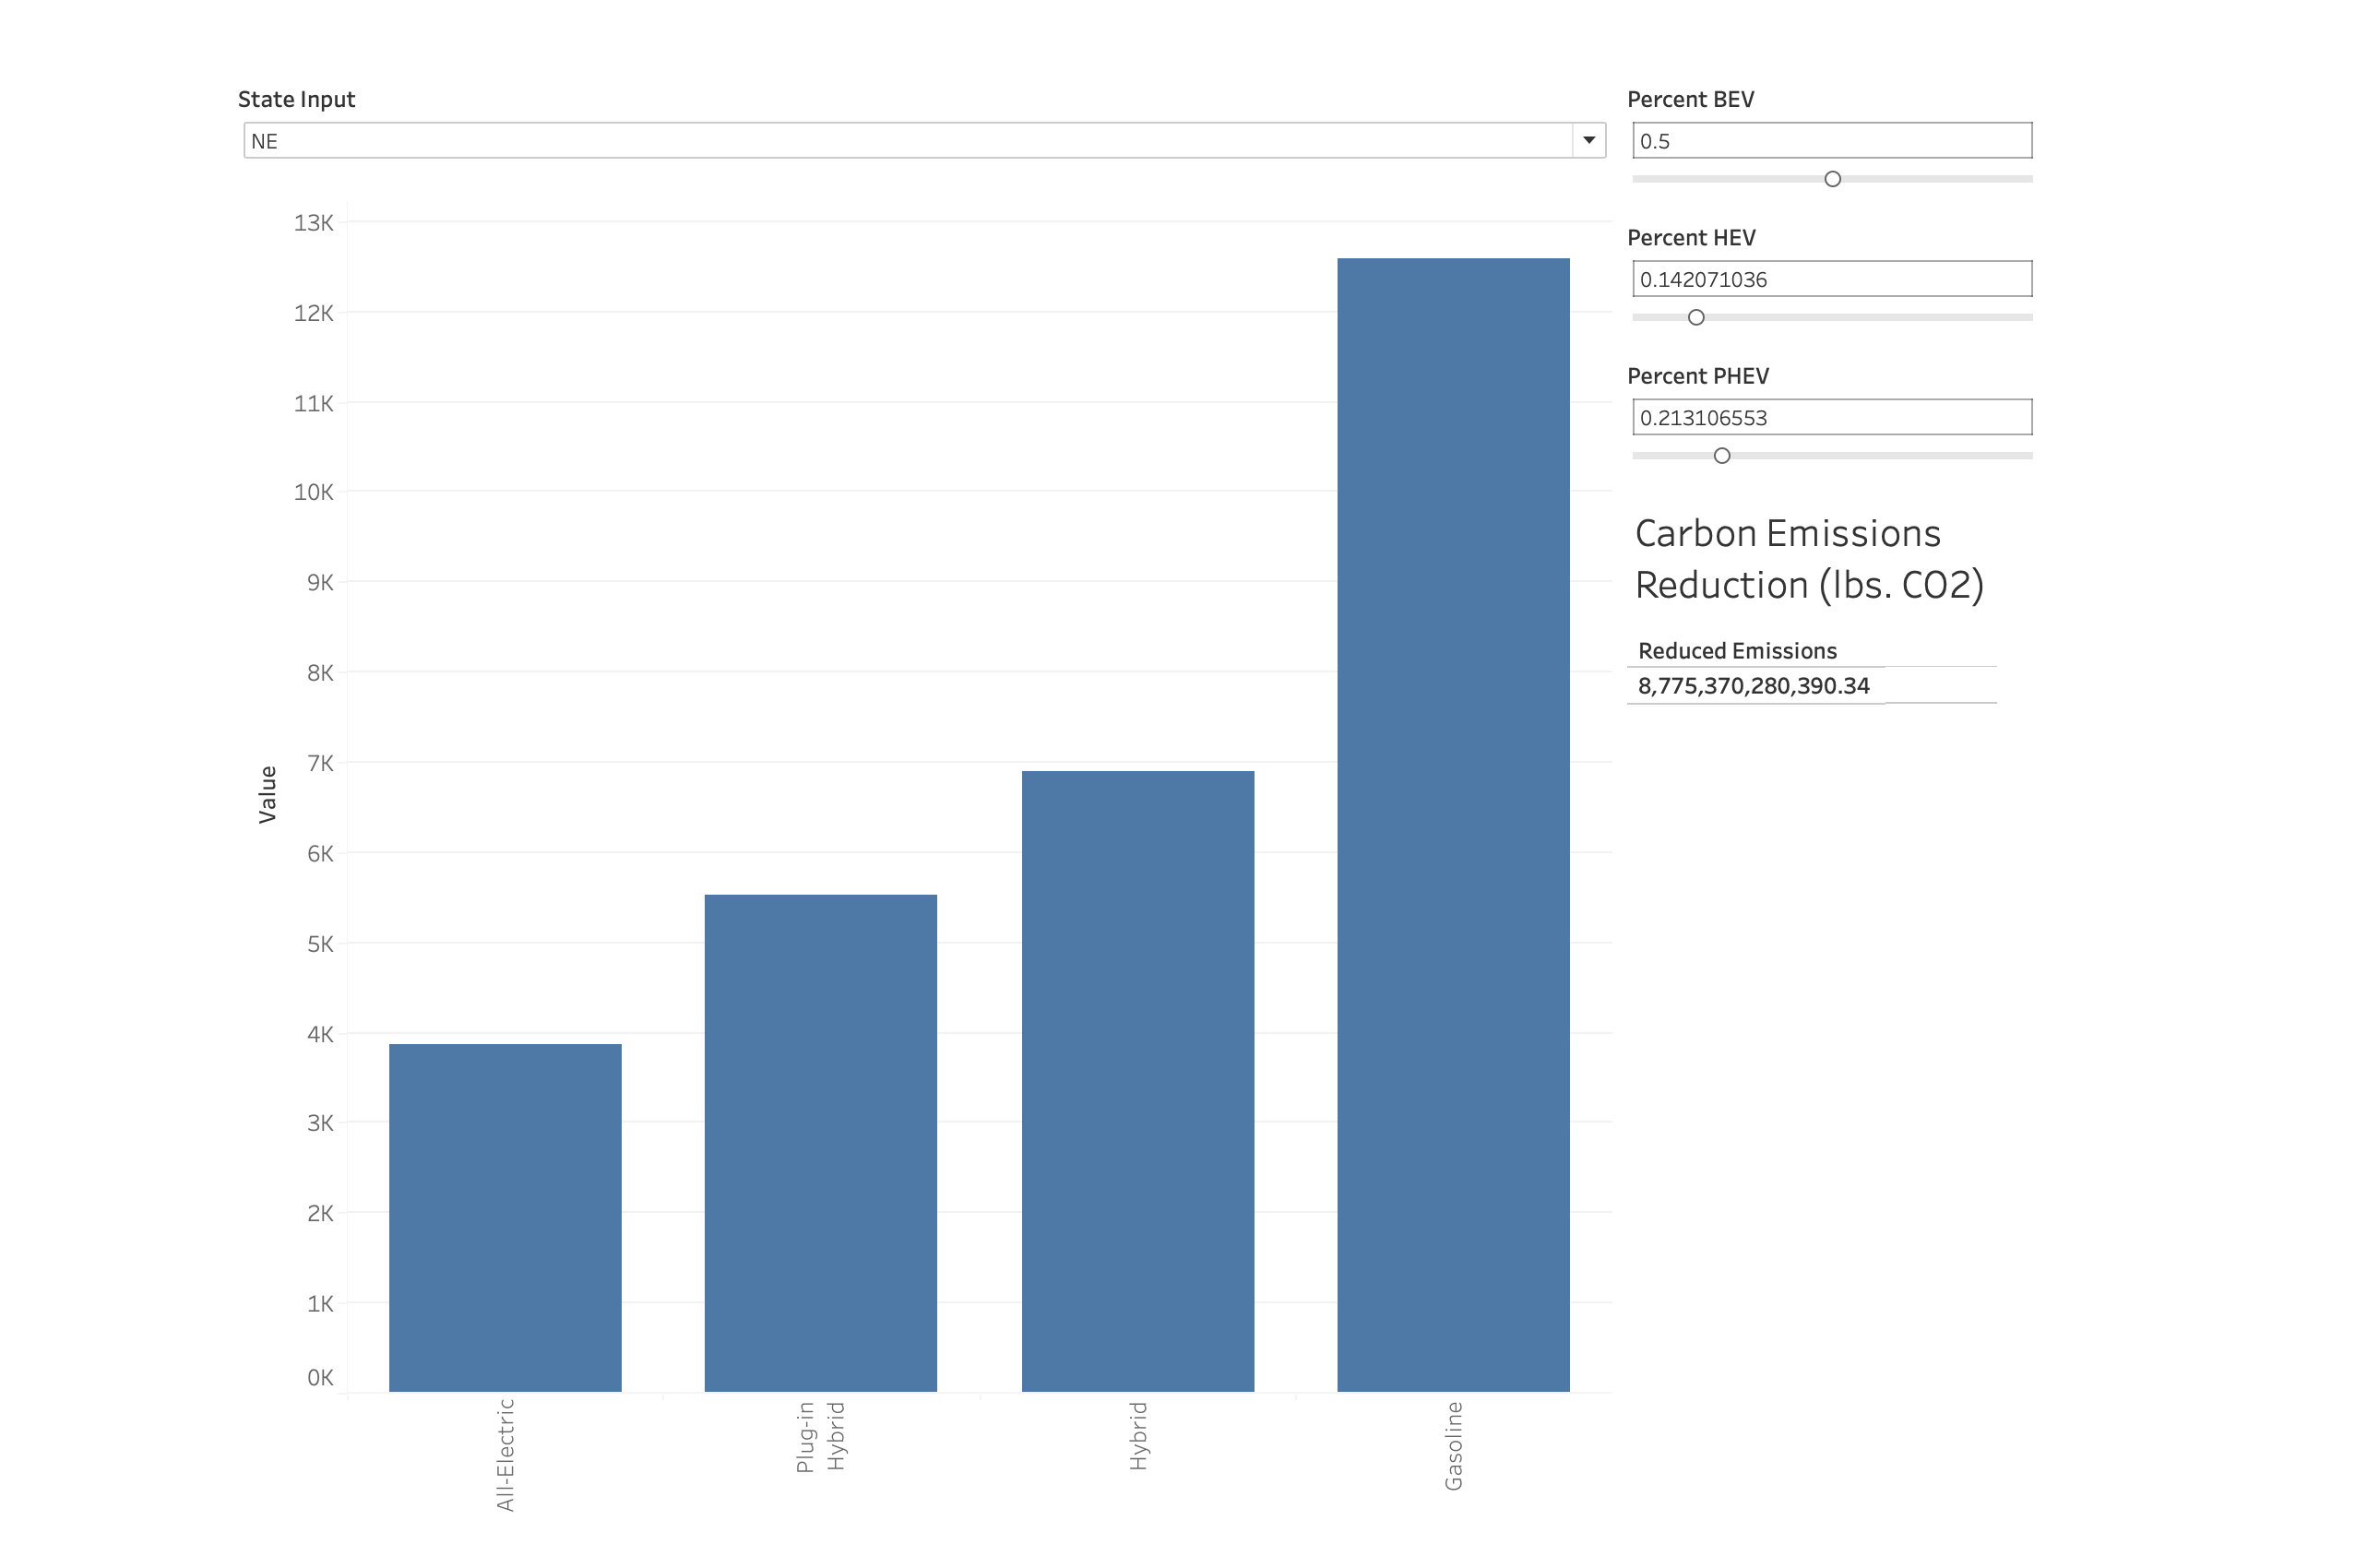

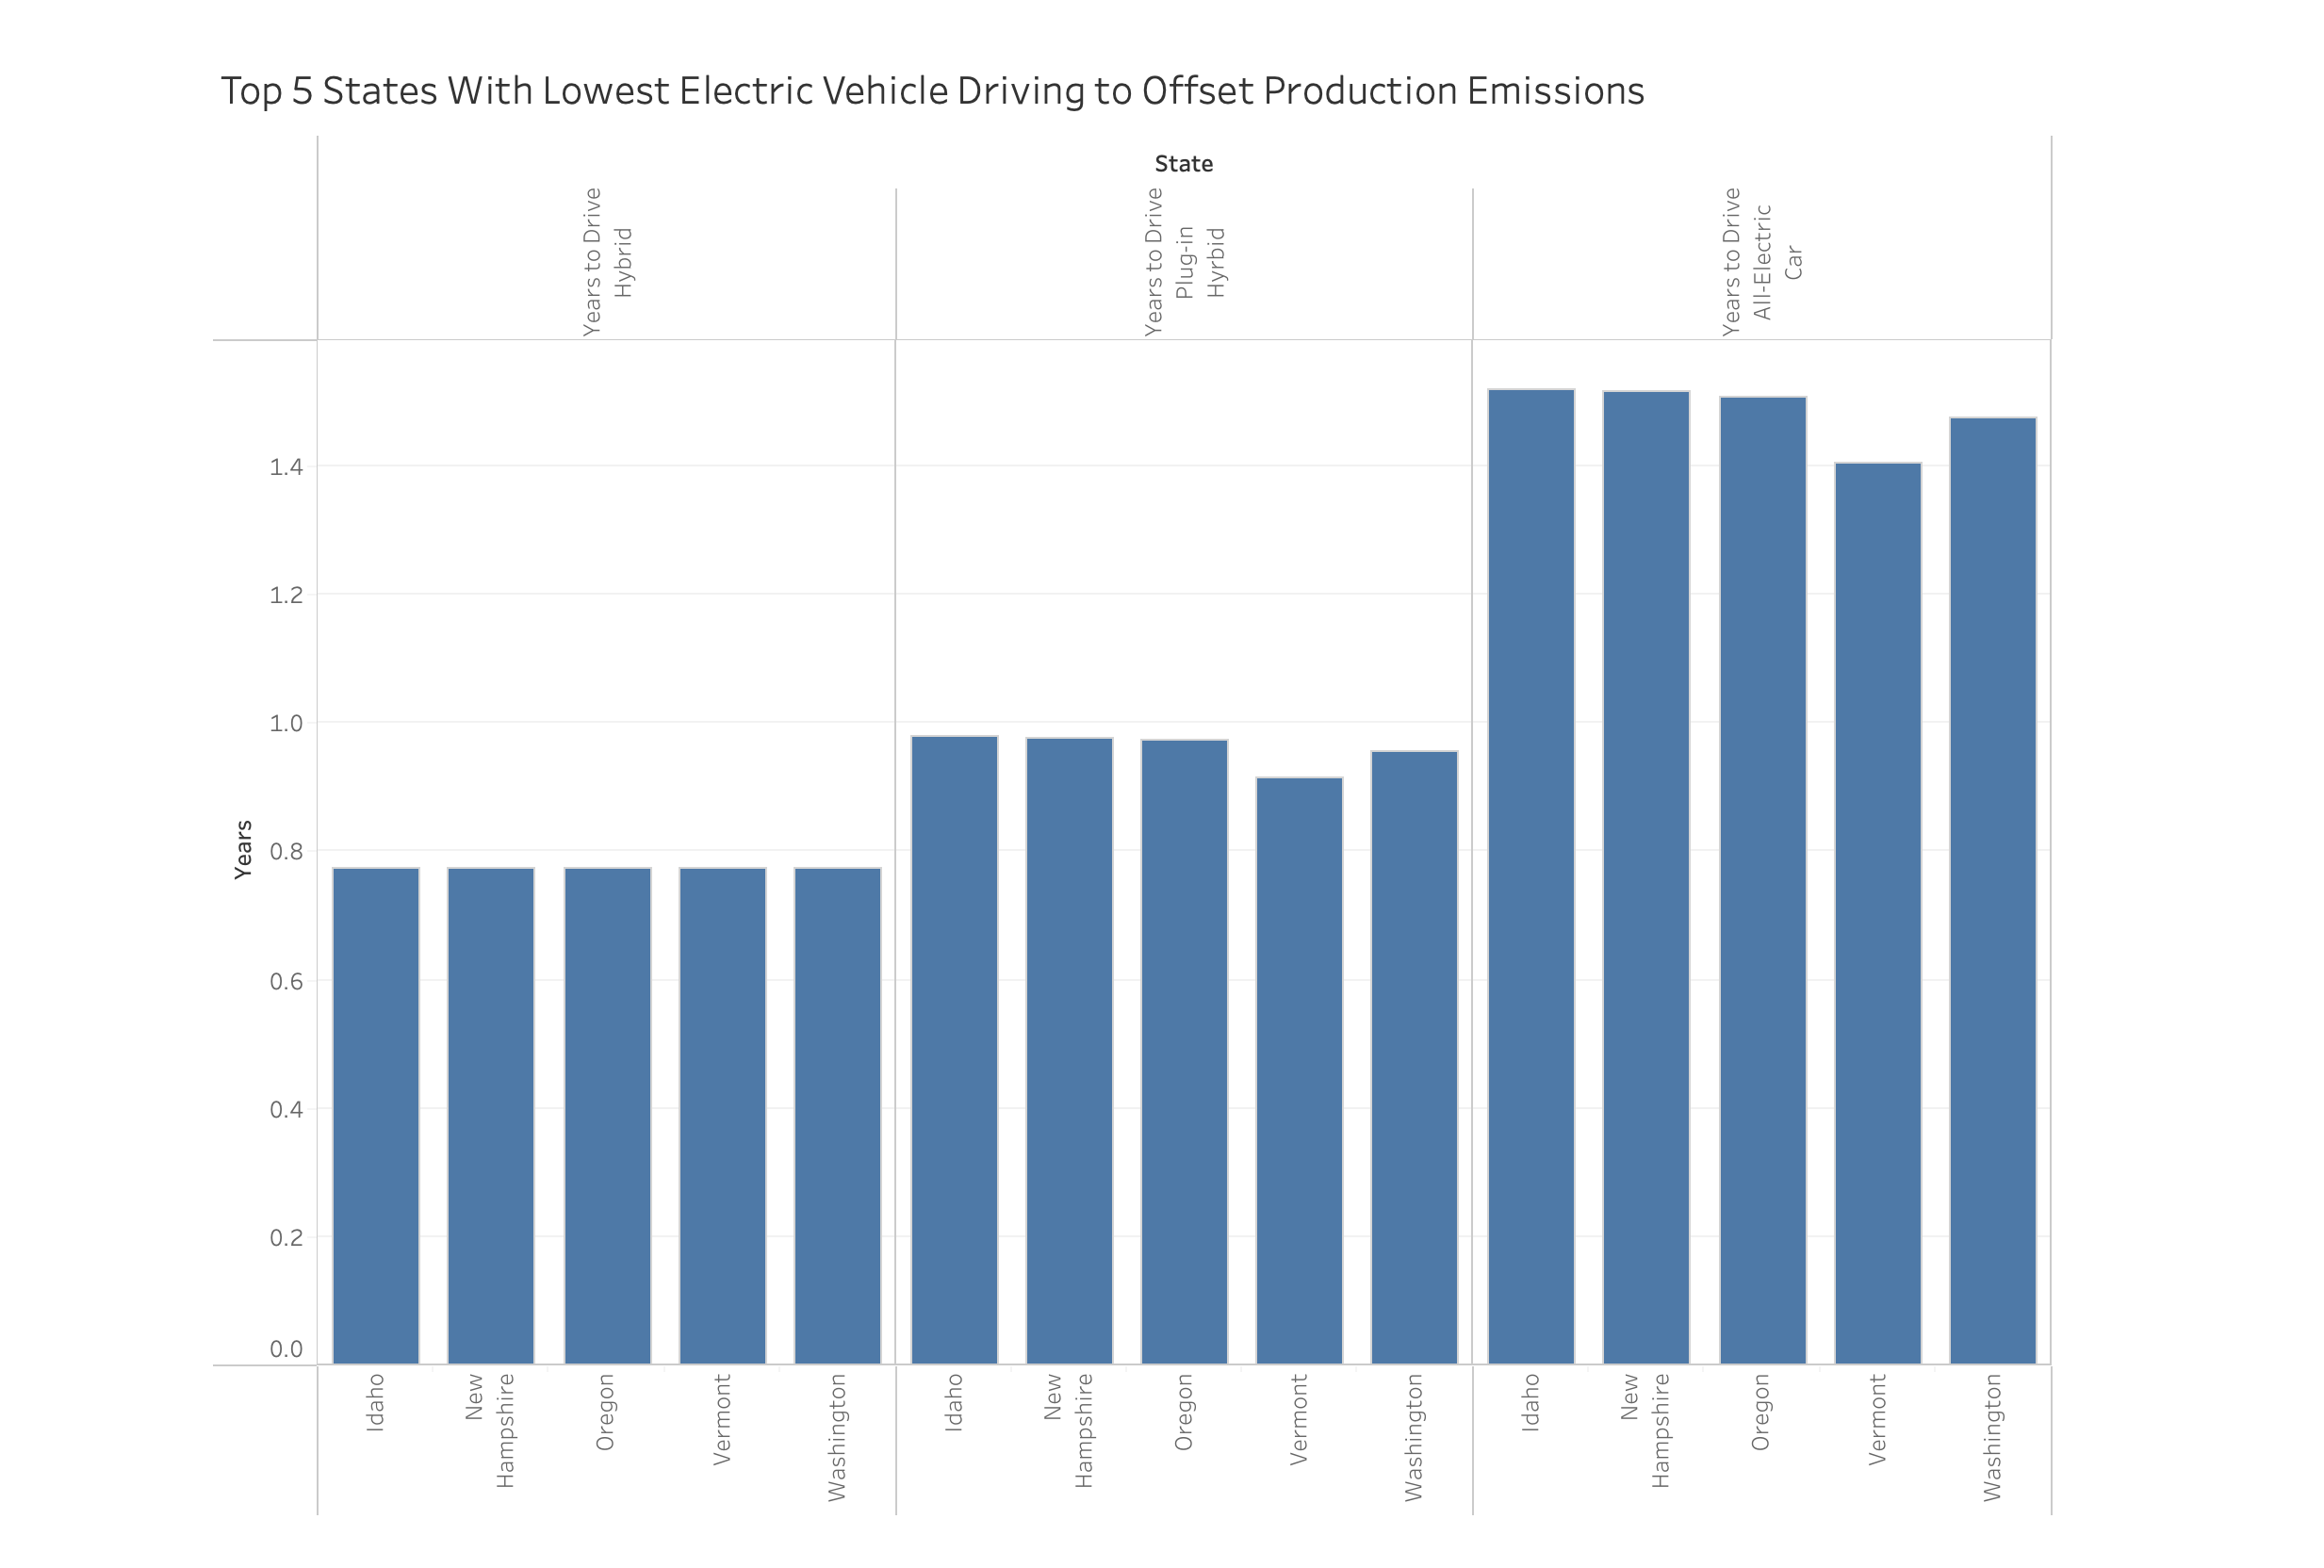

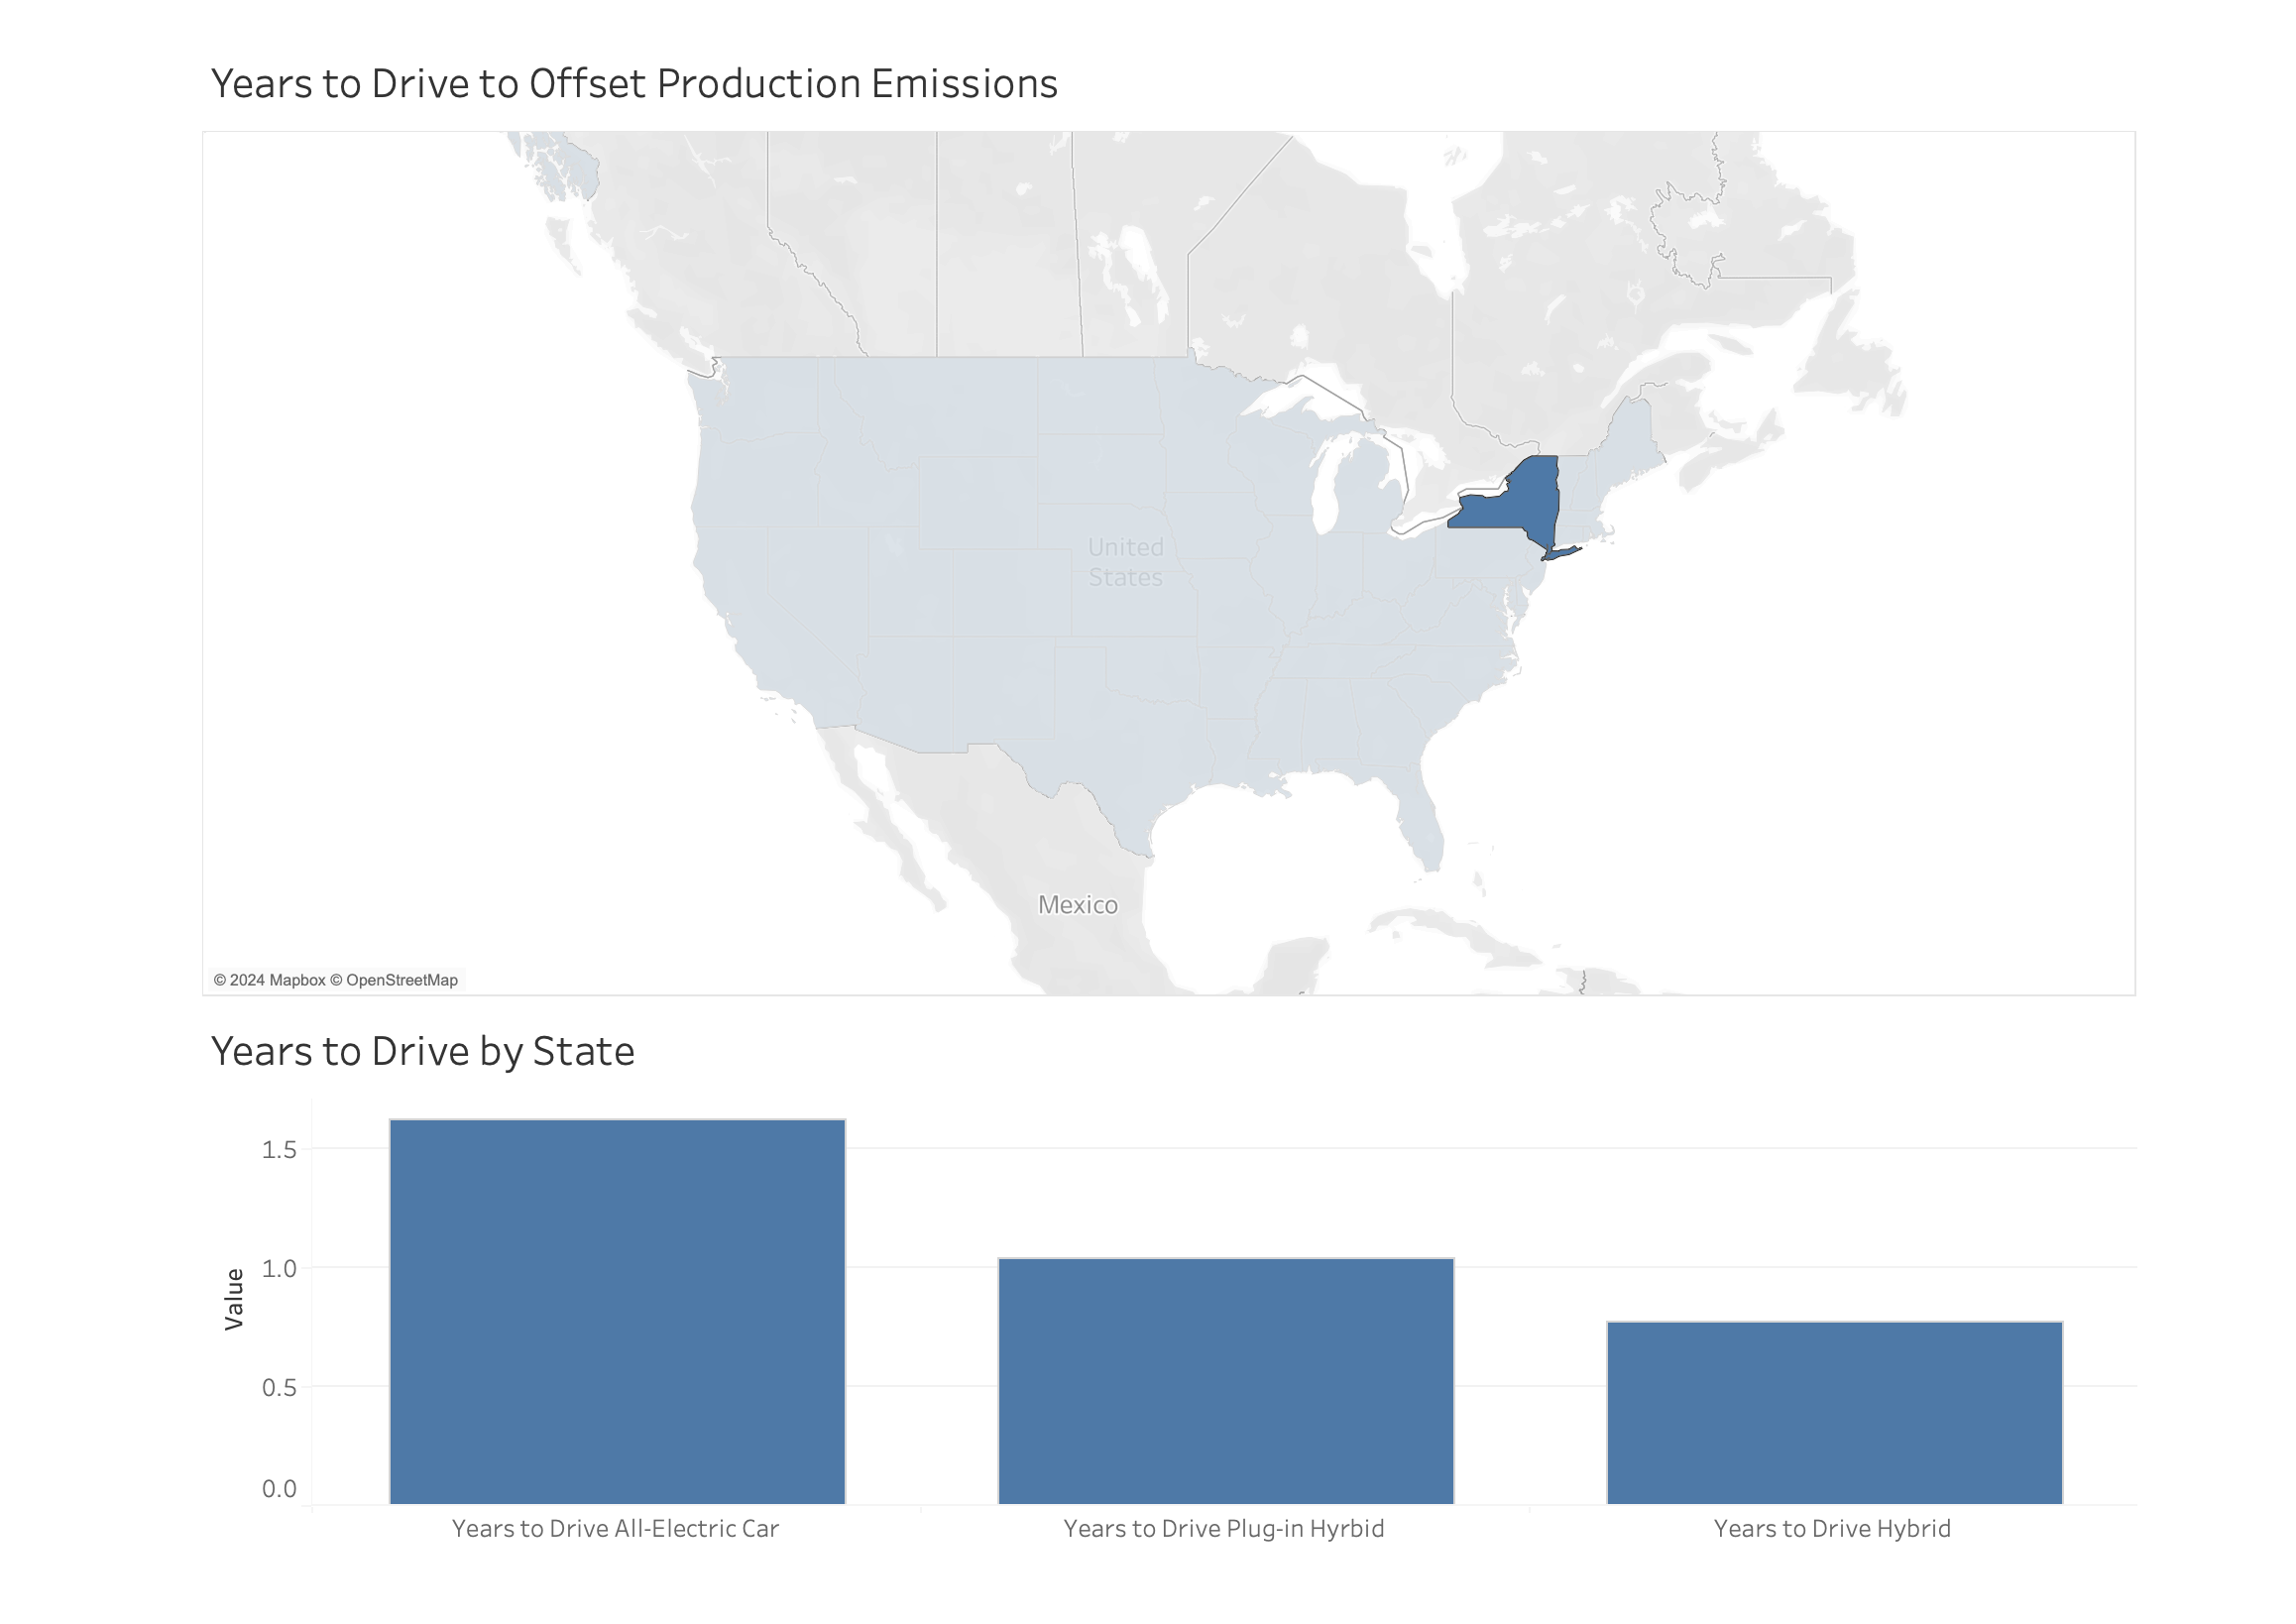

In [150]:
# 8.7 * 1000000000000 lbs. CO2 x 1 metric ton / 2204.623 lbs / 1000000
8.7 * 1000000000000 / 2204.623 / 1000000

3946.252942113005

In [ ]:
# Transportation sector emitted 6343 million metric tons of CO2 in the United States in 2022
# If this mix of people adopted electric cars it would decrease the emissions from the transportation sector by over 50%!
# Mix shown in chart: 50% All-Electric, 20% Plug-in Hybrid, 15% Hyrbid, and 15% Gasoline